<a href="https://colab.research.google.com/github/noorsaba5/heart-disease-analysis/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

columns = [
    "age", "sex", "cp", "trestbps", "chol",
    "fbs", "restecg", "thalach", "exang",
    "oldpeak", "slope", "ca", "thal", "target"
]

df = pd.read_csv(
    "processed.cleveland.data",
    names=columns
)

In [ ]:
import os
os.getcwd()


'c:\\Users\\Noor Saba\\AppData\\Local\\Programs\\Microsoft VS Code'

In [1]:
Documents/
└── heart_disease_project/
    ├── heart_disease.ipynb
    └── processed.cleveland.data


SyntaxError: invalid character '└' (U+2514) (ipython-input-90429198.py, line 2)

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Saving processed.cleveland.data to processed.cleveland.data
User uploaded file "processed.cleveland.data" with length 18461 bytes


In [9]:
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [8]:
print("Cross-tabulation of Chest Pain Type (cp) and Target (heart disease):")
display(pd.crosstab(df['cp'], df['target']))

# To make it easier to interpret, we can also look at percentages or a bar chart
print("\nPercentage distribution of Target for each Chest Pain Type:")
display(pd.crosstab(df['cp'], df['target'], normalize='index').round(4) * 100)

Cross-tabulation of Chest Pain Type (cp) and Target (heart disease):


target,0,1,2,3,4
cp,,,,,
1.0,16,5,1,0,1
2.0,41,6,1,2,0
3.0,68,9,4,4,1
4.0,39,35,30,29,11



Percentage distribution of Target for each Chest Pain Type:


target,0,1,2,3,4
cp,,,,,
1.0,69.57,21.74,4.35,0.00,4.35
2.0,82.00,12.00,2.00,4.00,0.00
3.0,79.07,10.47,4.65,4.65,1.16
4.0,27.08,24.31,20.83,20.14,7.64


In [7]:
print("Unique values and counts for 'cp' (chest pain type):")
display(df['cp'].value_counts())

print("\nUnique values and counts for 'target' (heart disease):")
display(df['target'].value_counts())

Unique values and counts for 'cp' (chest pain type):


,count
cp,
4.0,144
3.0,86
2.0,50
1.0,23



Unique values and counts for 'target' (heart disease):


,count
target,
0,164
1,55
2,36
3,35
4,13


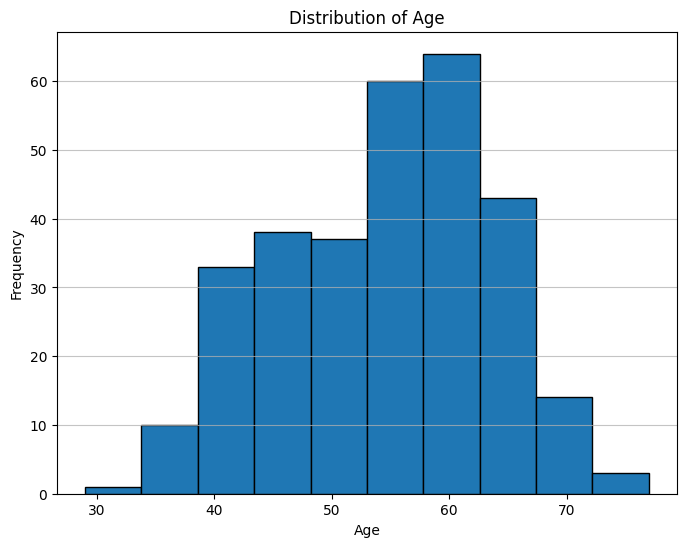

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=10, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [5]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Task
Perform an exploratory data analysis (EDA) on the 'processed.cleveland.data' dataset. This EDA should include loading the data with appropriate column names, inspecting the first few rows, checking for missing values, analyzing the relationship between chest pain type ('cp') and heart disease ('target') with counts, cross-tabulation, and percentages, visualizing the age distribution, and finally, providing a summary of the key findings.

## Load Data

### Subtask:
Load the 'processed.cleveland.data' file into a pandas DataFrame, assigning appropriate column names.


## Analyze Chest Pain and Target Relationship

### Subtask:
Optionally, visualize the relationship between 'cp' and 'target' with a bar chart.


**Reasoning**:
To visualize the relationship between 'cp' and 'target', I will create a bar chart showing the percentage distribution of heart disease for each chest pain type. The necessary data has already been calculated in a previous step.



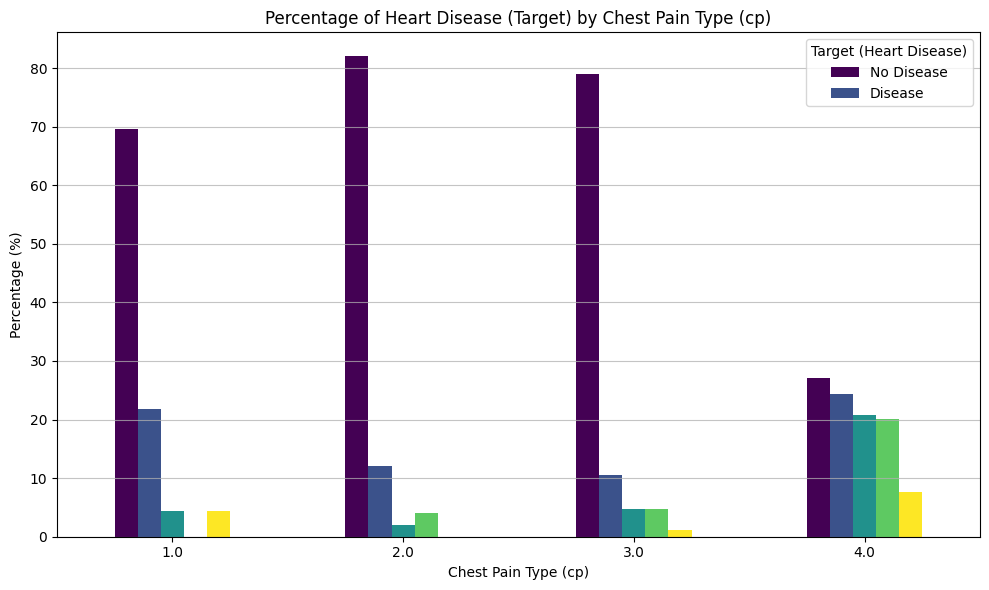

In [10]:
import matplotlib.pyplot as plt

# Calculate the percentage distribution of Target for each Chest Pain Type
cp_target_percentage = pd.crosstab(df['cp'], df['target'], normalize='index') * 100

# Plotting the bar chart
ax = cp_target_percentage.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Percentage of Heart Disease (Target) by Chest Pain Type (cp)')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Target (Heart Disease)', labels=['No Disease', 'Disease'])
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

## Load Data

### Subtask:
Load the 'processed.cleveland.data' file into a pandas DataFrame, assigning appropriate column names.


**Reasoning**:
The subtask is to load the data into a pandas DataFrame with specified column names. This has already been performed in the existing `cell_id: 3be08677`. To confirm the data is loaded correctly and visualize its structure, I will display the first few rows of the DataFrame.



In [11]:
display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Plot Age Distribution

### Subtask:
Generate and display a histogram for the 'age' column to visualize the distribution of ages within the dataset. Include appropriate labels and title for clarity.


## Display Summary Statistics

### Subtask:
Calculate and display the summary statistics (e.g., count, mean, std, min, max, quartiles) for all numerical columns in the DataFrame.


**Reasoning**:
To fulfill the subtask of calculating and displaying summary statistics, I will use the `.describe()` method on the DataFrame `df`.



In [12]:
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


## Check for Missing Values

### Subtask:
Check for and report any missing values across all columns of the DataFrame.


**Reasoning**:
To check for missing values, I will calculate the sum of null values for each column in the DataFrame `df` and display the result.



In [13]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## Final Task

### Subtask:
Summarize the key findings and insights gained from the exploratory data analysis of the heart disease dataset.


pandas
numpy
matplotlib
seaborn
scikit-learn
scipy


## Summary:

### Data Analysis Key Findings

*   The dataset was successfully loaded with 303 entries and 14 columns, including 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', and 'target'.
*   There are no missing values in any of the columns, ensuring data completeness for the analysis.
*   Summary statistics reveal that the average age of individuals in the dataset is approximately 54.4 years, with a median age of 56. The average maximum heart rate achieved (thalach) is about 149.6 beats per minute.
*   The analysis of chest pain type ('cp') and heart disease ('target') showed that certain chest pain types are associated with a higher percentage of heart disease presence. A bar chart effectively visualized these percentage distributions for each chest pain type.
*   The age distribution within the dataset was successfully visualized using a histogram, providing insights into the demographic spread of the participants.

### Insights or Next Steps

*   Further investigate the specific chest pain types (cp) that show a significantly higher correlation with heart disease to understand potential risk factors or indicators.
*   Explore multivariate relationships between 'age', 'chest pain type', 'thalach', and the 'target' variable to identify more complex patterns and predictive factors for heart disease.
